# Simulated Benchmarks

tests die ich wiederholen muss:

mesh 20
evtl mesh 10

75
100


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import math

In [9]:
p_30 = pd.read_json("simulated/30.json")
p_50 = pd.read_json("simulated/50.json")
p_75 = pd.read_json("simulated/75.json")
p_100 = pd.read_json("simulated/100.json")
p_125 = pd.read_json("simulated/125.json")
single_datasets = [p_30, p_50, p_75, p_100, p_125]
single_labels = ['30 Clients', '50 Clients', '75 Clients', '100 Clients', '125 Clients']

single_index = [30, 50, 75, 100, 125]

# mehsed sets
m_10 = pd.read_json("meshes/125mesh10_2.json")
m_30 = pd.read_json("meshes/125mesh30.json")
m_50 = pd.read_json("meshes/125mesh50.json")
m_70 = pd.read_json("meshes/125mesh70.json")
m_90 = pd.read_json("meshes/125mesh90.json")

meshed_datasets = [m_10, m_30, m_50, m_70, m_90]

meshed_index = [10, 30, 50, 70, 90]

#mesh 30 sets

# mehsed sets
m_30_60 = pd.read_json("m30/60.json")
m_30_120 = pd.read_json("m30/120.json")
m_30_180 = pd.read_json("m30/180.json")
m_30_240 = pd.read_json("m30/240.json")

m_30_datasets = [m_30_60, m_30_120, m_30_180, m_30_240]

m_30_index = [60, 120, 180, 240]

bandwidth_30 = [81.31, 388.35, 536.13, 644.4]

bandwidth_1 = 10.19
bandwidth_no_cdn = [611.4, 1222.8, 1834.2, 2445.6]



     Total  Peer  Server  Min #Server Requests
30    3499  3103     396            116.633333
50    5151  3989    1162            103.020000
75    3692  2680    1012             49.226667
100   4384  1854    2530             43.840000
125  13140  7870    5270            105.120000
0.8868248070877394
0.7744127353911862
0.7258938244853738
0.4229014598540146
0.5989345509893456


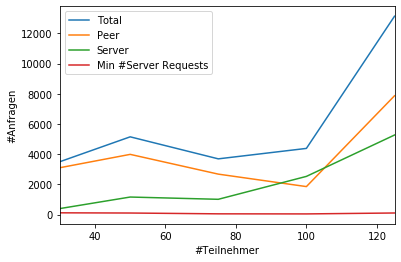

In [27]:
result = []

for i, dataset in enumerate(single_datasets):
    grouped = dataset.groupby('method').size()
    total = grouped[0] + grouped[1]
    peer = grouped[0]
    server = grouped[1]
    minimum = total/single_index[i]
    result.append([total, peer, server, minimum])
test = pd.DataFrame(result, index=single_index, columns=['Total', 'Peer', 'Server', 'Min #Server Requests']) 
print(test)
for row in result:
    #print(row['total'])
    print((row[1]/row[0]))
plot = test.plot()

plot.set_xlabel("#Teilnehmer")
plot.set_ylabel("#Anfragen")
plt.savefig("single_mesh_line.pdf")
# 50 lief nur 9 min
# 75 ebenfalls nur 75min
# was ist bei 125 los??

0.8431652394544877
0.9206462909901305
0.9038184164579063
0.8645898073337477
0.49751611170784105
    Total   Peer  Server  Min #Server Requests
10  12612  10634    1978              1311.648
30  12564  11567     997               502.560
50  13173  11906    1267               316.152
70  12872  11129    1743               205.952
90  14896   7411    7485               238.336


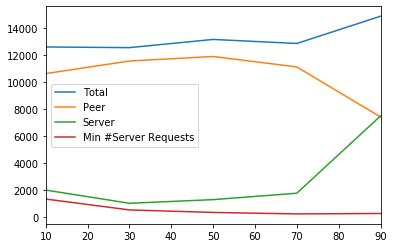

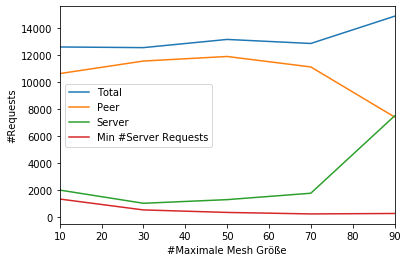

In [28]:
result = []


for i, dataset in enumerate(meshed_datasets):
    grouped = dataset.groupby('method').size()
    total = grouped[0] + grouped[1]
    peer = grouped[0]
    server = grouped[1]
    minimum = (total/125)*(math.ceil(125/meshed_index[i]))
    result.append([total, peer, server, minimum])
test = pd.DataFrame(result, index=meshed_index, columns=['Total', 'Peer', 'Server', 'Min #Server Requests']) 
for row in result:
    #print(row['total'])
    print((row[1]/row[0]))
print(test)
plot = test.plot()
plot.set_xlabel("#Maximale Mesh Größe")
plot.set_ylabel("#Requests")
plt.savefig("mesh_comparison.pdf")

count    9277.000000
mean      135.904800
std       295.563054
min         7.855000
25%        30.910000
50%        63.255000
75%       148.170000
max      2992.025000
Name: loadTime, dtype: float64
[[28], [91], [116], [216], [657]]


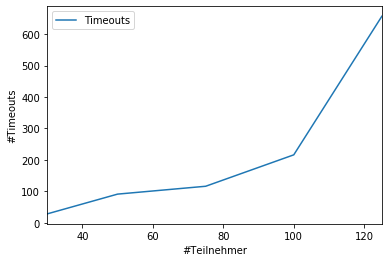

In [12]:
# Timeouts single

#allSinglePeerData = pd.concat(datasets).loc[data['method'] == 'peerResponse']
#allSingleServerData = pd.concat(datasets).loc[data['method'] == 'serverResponse']

data = pd.concat(single_datasets)
serverResponses = data.loc[data['method'] == 'serverResponse']
mask = serverResponses['loadTime'] <= 3000
print(serverResponses[mask]['loadTime'].describe())

result = []
for i, dataset in enumerate(single_datasets):
    # grouped = dataset.groupby('method').size()
    #dataset = dataset.loc[data['method'] == 'serverResponse']
    mask = dataset['loadTime'] >= 3000
    timeouts = [dataset[mask]['loadTime'].size]
    result.append(timeouts)
test = pd.DataFrame(result, index=single_index, columns=['Timeouts']) 
print(result)
plot = test.plot()
plot.set_xlabel("#Teilnehmer")
plot.set_ylabel("#Timeouts")
#plt.savefig(str(i)+".pdf")
plt.savefig("timeouts_single.pdf")

count    11932.000000
mean       256.570461
std        398.727530
min          5.380000
25%         20.637500
50%         71.127500
75%        344.600000
max       2983.335000
Name: loadTime, dtype: float64
[[6], [6], [121], [163], [1355]]


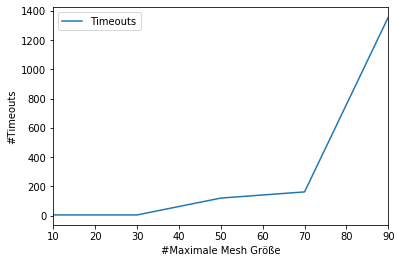

In [13]:
# Timeouts meshed

#allSinglePeerData = pd.concat(datasets).loc[data['method'] == 'peerResponse']
#allSingleServerData = pd.concat(datasets).loc[data['method'] == 'serverResponse']

data = pd.concat(meshed_datasets)
serverResponses = data.loc[data['method'] == 'serverResponse']
mask = serverResponses['loadTime'] <= 3000
print(serverResponses[mask]['loadTime'].describe())

meshed_result = []
for i, m_dataset in enumerate(meshed_datasets):
    # grouped = dataset.groupby('method').size()
    #dataset = dataset.loc[data['method'] == 'serverResponse']
    mask = m_dataset['loadTime'] >= 3000
    timeouts = [m_dataset[mask]['loadTime'].size]
    meshed_result.append(timeouts)
test = pd.DataFrame(meshed_result, index=meshed_index, columns=['Timeouts']) 
print(meshed_result)
plot = test.plot()
plot.set_xlabel("#Maximale Mesh Größe")
plot.set_ylabel("#Timeouts")
plt.savefig("timeouts_meshed.pdf")

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


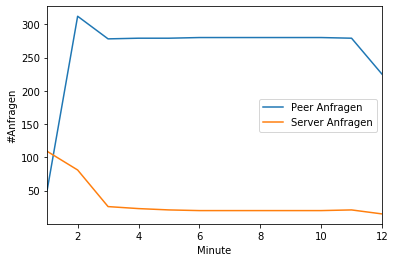

In [14]:
# rampup

# gruppieren nach server/peer
# currentTime als x
tmp_set = single_datasets[0]
data = pd.concat(single_datasets)
maskServer = tmp_set['method'] == 'serverResponse'
#print()
maskPeer = tmp_set['method'] == 'peerResponse'

#print(single_datasets[0])
allPeerData = tmp_set[maskPeer]
allServerData = tmp_set[maskServer]

first = allPeerData['currentTime'].min();
last = allPeerData['currentTime'].max();
allPeerData['timeDiff'] = round((allPeerData['currentTime']-first)/1000/60)
allServerData['timeDiff'] = round((allServerData['currentTime']-first)/1000/60)

peerOverTime = allPeerData.groupby('timeDiff').size()
serverOverTime = allServerData.groupby('timeDiff').size()

#res = []

result = []
index = []
for i, timing in enumerate(peerOverTime):
    result.append([timing, serverOverTime[i]])
    index.append(i+1)
    

#for i, dataset in enumerate(single_datasets):
#    grouped = allPeerData.groupby('timeDiff').size()
#    result.append([grouped])
    #print(grouped)
#print(result)
test = pd.DataFrame(result, index=index, columns=['Peer Anfragen', 'Server Anfragen']) 
#print(test)
plot = test.plot()
plot.set_xlabel("Minute")
plot.set_ylabel("#Anfragen")
plt.savefig("peer_vs_server_over_time.pdf")

     Total   Peer  Server  Min #Server Requests
60    6129   4589    1540               637.416
120  12169   8534    3635               486.760
180  18184  13222    4962               436.416
240  24455  18669    5786               391.280
0.7487355196606298
0.7012901635302818
0.7271227452705675
0.763402167245962


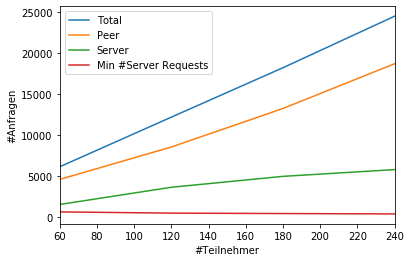

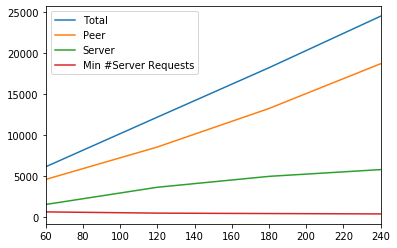

In [29]:
result = []


for i, dataset in enumerate(m_30_datasets):
    grouped = dataset.groupby('method').size()
    total = grouped[0] + grouped[1]
    peer = grouped[0]
    server = grouped[1]
    minimum = (total/125)*(math.ceil(125/meshed_index[i]))
    result.append([total, peer, server, minimum])
test = pd.DataFrame(result, index=m_30_index, columns=['Total', 'Peer', 'Server', 'Min #Server Requests']) 
print(test)
plot  = test.plot()
plot.set_xlabel("#Teilnehmer")
plot.set_ylabel("#Anfragen")
plt.savefig("meshed_30_line.pdf")
for row in result:
    #print(row['total'])
    print((row[1]/row[0]))


/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


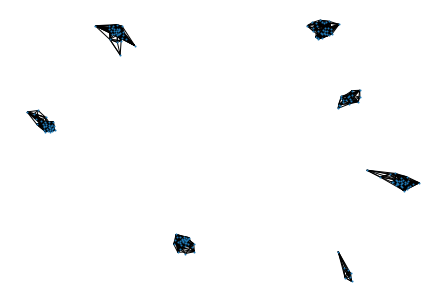

In [16]:

dataset = m_30_datasets[2]

mask = dataset['method'] == 'peerResponse'

dataset = dataset[mask]
peerIds = dataset.get('from').append(dataset.get('peerId'))
#peerIds.drop(peerIds.index['server'])
peerIds = peerIds.unique()
peerIds = np.delete(peerIds, np.where(peerIds == 'server'))
labels = [*range(1,peerIds.size+1)]
fromIds = dataset.get('peerId').replace(peerIds, labels) # data.get('peerId')
toIds = dataset.get('from').replace(peerIds, labels)

# Build a dataframe with your connections
# This time a pair can appear 2 times, in one side or in the other!
df = pd.DataFrame({ 'from': fromIds, 'to': toIds})
# Build your graph. Note that we use the DiGraph function to create the graph!
G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.DiGraph() )

#pos=nx.circular_layout(G) 
pos = nx.spring_layout(G)
# Make the graph
#nx.draw(G, pos=pos, with_labels=True, node_size=1500, alpha=1, arrows=True)
nx.draw(G, pos=pos, with_labels=False, node_size=1, alpha=1, arrows=False)

plt.show()
#plt.savefig(str(i)+".pdf")
#plt.savefig(str(i)+".png")

#plt.clf()
#G.clear()
#for i, dataset in enumerate(meshed_datasets):
    # ------- DIRECTED#
    #print(i)
#    peerIds = dataset.get('from').append(dataset.get('peerId'))
    #peerIds.drop(peerIds.index['server'])
#    peerIds = peerIds.unique()
#    peerIds = np.delete(peerIds, np.where(peerIds == 'server'))
 #   labels = [*range(1,peerIds.size+1)]
  #  fromIds = dataset.get('peerId').replace(peerIds, labels) # data.get('peerId')
   # toIds = dataset.get('from').replace(peerIds, labels)

    # Build a dataframe with your connections
    # This time a pair can appear 2 times, in one side or in the other!
    #df = pd.DataFrame({ 'from': fromIds, 'to': toIds})
    # Build your graph. Note that we use the DiGraph function to create the graph!
    #G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.DiGraph() )
    
    #pos=nx.circular_layout(G) 
# Make the graph
    #nx.draw(G, pos=pos, with_labels=True, node_size=1500, alpha=1, arrows=True)
#plt.savefig(str(i)+".pdf")
#plt.savefig(str(i)+".png")

    #plt.clf()
    #G.clear()